<h3>Eye blink data feature extraction method</h3>

In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

<hr>
<h3>user1 data extraction</h3>

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

<hr>
<h3>user2 data extraction</h3>

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

<hr>
<h3>Artifact data extraction</h3>

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

<hr>
<h3>Eye blink data preprocessing</h3>

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
print('Number of user1 data', len(user1Data))

Number of user1 data 841


In [23]:
print('Number of user2 data', len(user2Data))

Number of user2 data 1516


In [24]:
print('Number of artifact data', len(user3Data))

Number of artifact data 882


<hr>
<h3>Data sum</h3>

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

<hr>
<h3>Data mixing</h3>

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([2, 2, 2, ..., 0, 2, 1])

<hr>
<h3>Data sharing & create labels</h3>

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

<hr>
<h3>Data regularization</h3>

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

<hr>
<h3>import modules</h3>

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

<hr>
<h3>Make model method</h3>

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        
    if(hidden == 4):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[3], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

<hr>
<h3>Result</h3>

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 1   Node:[ 4 ,]  BatchSize: 512   Dropout: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 52        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
loss min : 0.32870821277300516   acc max: 0.885000003973643
loss mean : 0.43250608289957043   acc mean: 0.859696666241487


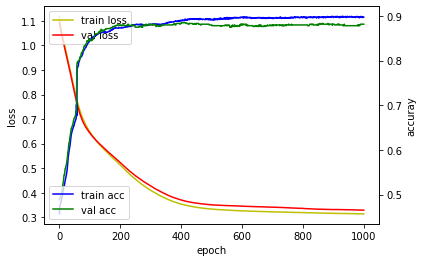

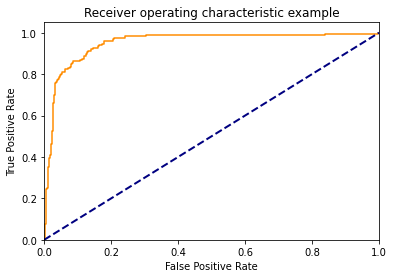


fpr :,[0.         0.00222222 0.00222222 0.00444444 0.00444444 0.00666667
 0.00666667 0.00888889 0.00888889 0.01111111 0.01111111 0.01333333
 0.01333333 0.01777778 0.01777778 0.02       0.02       0.02222222
 0.02222222 0.02444444 0.02444444 0.02666667 0.02666667 0.02888889
 0.02888889 0.03111111 0.03111111 0.03333333 0.03333333 0.03555556
 0.03555556 0.03777778 0.03777778 0.04222222 0.04222222 0.04444444
 0.04444444 0.04666667 0.04666667 0.04888889 0.04888889 0.05333333
 0.05333333 0.05777778 0.06222222 0.06222222 0.07111111 0.07111111
 0.07777778 0.07777778 0.08       0.08       0.08444444 0.08444444
 0.08666667 0.08666667 0.10666667 0.10666667 0.11333333 0.11333333
 0.11777778 0.11777778 0.12       0.12       0.12444444 0.12444444
 0.12888889 0.12888889 0.13111111 0.13111111 0.14       0.14
 0.14666667 0.14666667 0.16       0.16       0.16222222 0.16222222
 0.17333333 0.17333333 0.18       0.18       0.20444444 0.20444444
 0.20888889 0.20888889 0.24       0.24       0.25555556 0.26


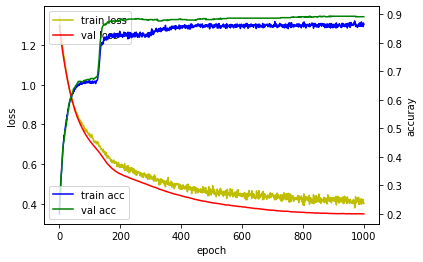

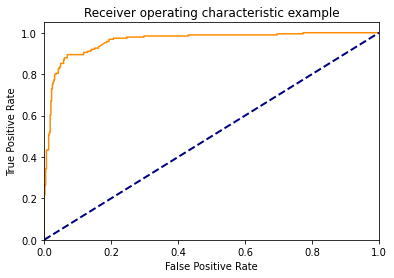


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.00888889 0.01333333 0.01333333
 0.01555556 0.01555556 0.01777778 0.01777778 0.02       0.02
 0.02222222 0.02222222 0.02444444 0.02444444 0.02666667 0.02666667
 0.02888889 0.02888889 0.03111111 0.03111111 0.03555556 0.03555556
 0.04       0.04222222 0.04222222 0.04444444 0.04444444 0.04666667
 0.04666667 0.04888889 0.04888889 0.05777778 0.05777778 0.06
 0.06       0.06888889 0.06888889 0.11777778 0.11777778 0.12888889
 0.12888889 0.13777778 0.13777778 0.14222222 0.14222222 0.15111111
 0.15111111 0.16222222 0.16222222 0.18222222 0.18666667 0.18666667
 0.19333333 0.19333333 0.20666667 0.20666667 0.21777778 0.22222222
 0.24666667 0.24666667 0.26888889 0.27333333 0.29777778 0.29777778
 0.30888889 0.31333333 0.41555556 0.42       0.43111111 0.43111111
 0.50222222 0.50666667 0.54       0.54444444 0.56666667 0.57111111
 0.64       0.64444444 0.65111111 0.65555556 0.68       0.68444444


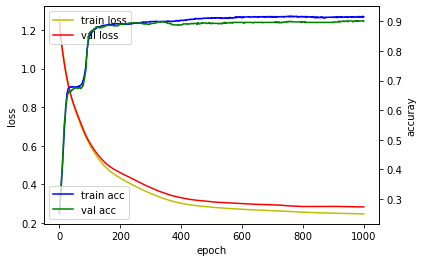

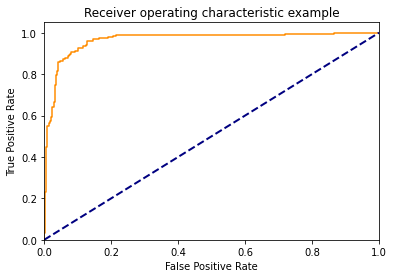


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.00888889 0.00888889 0.01333333
 0.01555556 0.01555556 0.01777778 0.01777778 0.02       0.02
 0.02222222 0.02222222 0.02444444 0.02444444 0.02888889 0.02888889
 0.03111111 0.03111111 0.03555556 0.03555556 0.03777778 0.03777778
 0.04       0.04       0.04222222 0.04222222 0.04666667 0.04666667
 0.05111111 0.05555556 0.05555556 0.06222222 0.06222222 0.07111111
 0.07111111 0.07333333 0.07333333 0.07777778 0.07777778 0.08
 0.08       0.09333333 0.09333333 0.10222222 0.10222222 0.11555556
 0.11555556 0.12444444 0.12444444 0.12888889 0.12888889 0.14666667
 0.14666667 0.16444444 0.16444444 0.19111111 0.19111111 0.20444444
 0.20444444 0.21555556 0.21555556 0.22888889 0.23333333 0.27333333
 0.27777778 0.28222222 0.28666667 0.37333333 0.37777778 0.51777778
 0.52222222 0.59555556 0.6        0.71777778 0.71777778 0.74
 0.74444444 0.79333333 0.79777778 0.82       0.82444444 0.86666667
 0.866

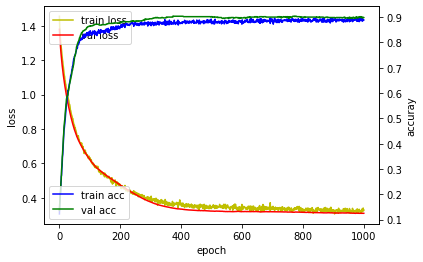

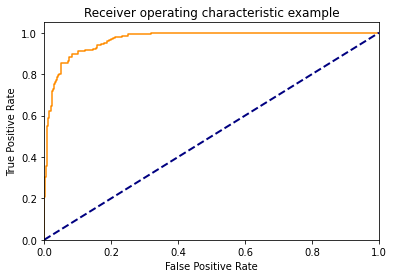


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00666667
 0.00666667 0.00888889 0.00888889 0.01111111 0.01111111 0.01333333
 0.01333333 0.01555556 0.01555556 0.02       0.02       0.02222222
 0.02222222 0.02444444 0.02444444 0.02666667 0.02666667 0.02888889
 0.02888889 0.03333333 0.03333333 0.03555556 0.03555556 0.03777778
 0.03777778 0.04222222 0.04222222 0.04444444 0.04444444 0.05111111
 0.05111111 0.07111111 0.07111111 0.07333333 0.07333333 0.07555556
 0.07555556 0.08444444 0.08444444 0.1        0.1        0.11777778
 0.12222222 0.12222222 0.14666667 0.14666667 0.15333333 0.15333333
 0.15777778 0.15777778 0.17111111 0.17111111 0.17777778 0.17777778
 0.18666667 0.18666667 0.19333333 0.19333333 0.2        0.2
 0.20444444 0.20444444 0.21111111 0.21111111 0.22222222 0.22666667
 0.23111111 0.23111111 0.25111111 0.25111111 0.31777778 0.31777778
 0.38       0.38444444 0.42444444 0.42888889 0.49333333 0.49777778
 0.51333333 0.51777778 0.56666667 0.57111111 0.58       0.5844

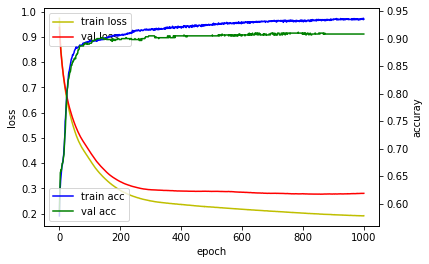

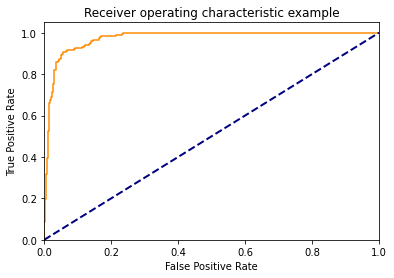


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00888889 0.00888889 0.01111111 0.01111111 0.01333333
 0.01333333 0.01555556 0.01555556 0.01777778 0.01777778 0.02
 0.02       0.02222222 0.02222222 0.02444444 0.02444444 0.02666667
 0.02666667 0.02888889 0.02888889 0.03555556 0.03555556 0.04222222
 0.04222222 0.04444444 0.04444444 0.04888889 0.04888889 0.05333333
 0.05333333 0.05555556 0.05555556 0.06444444 0.06444444 0.06666667
 0.06666667 0.08888889 0.08888889 0.09111111 0.09111111 0.11333333
 0.11333333 0.12       0.12       0.12222222 0.12222222 0.13333333
 0.13333333 0.13555556 0.13555556 0.14       0.14       0.14666667
 0.14666667 0.16222222 0.16222222 0.16666667 0.16666667 0.17111111
 0.17111111 0.21555556 0.21555556 0.23333333 0.23333333 0.23555556
 0.23555556 0.24888889 0.25333333 0.3        0.30444444 0.30666667
 0.31111111 0.39777778 0.40222222 0.51555556 0.52       0.52444444
 0.52888889 0.62666667 0.63555556 0.74       0.74444444 0.828

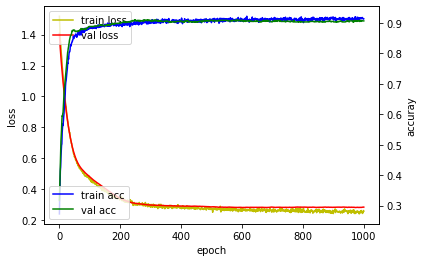

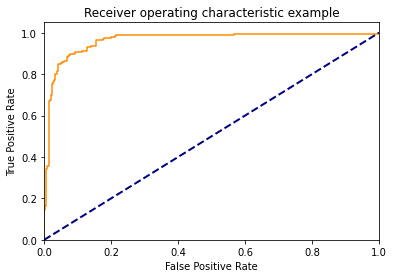


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.00888889 0.00888889 0.01333333
 0.01333333 0.01555556 0.01555556 0.01777778 0.01777778 0.02
 0.02       0.02222222 0.02222222 0.02444444 0.02444444 0.02666667
 0.02666667 0.02888889 0.02888889 0.03111111 0.03111111 0.03333333
 0.03333333 0.03777778 0.03777778 0.04       0.04       0.04222222
 0.04222222 0.04444444 0.04888889 0.04888889 0.05333333 0.05333333
 0.06       0.06       0.06666667 0.06666667 0.06888889 0.06888889
 0.07111111 0.07111111 0.07333333 0.07333333 0.07777778 0.07777778
 0.09333333 0.09333333 0.11333333 0.11333333 0.12888889 0.12888889
 0.14       0.14       0.15333333 0.15333333 0.15555556 0.15555556
 0.17555556 0.17555556 0.18       0.18       0.2        0.2
 0.21111111 0.21111111 0.21333333 0.21333333 0.23111111 0.23555556
 0.29555556 0.3        0.38666667 0.39111111 0.43333333 0.43777778
 0.49111111 0.49555556 0.56666667 0.56666667 0.60444444 0.60888889
 

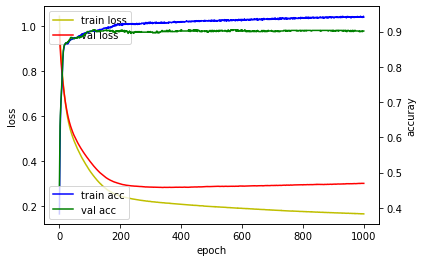

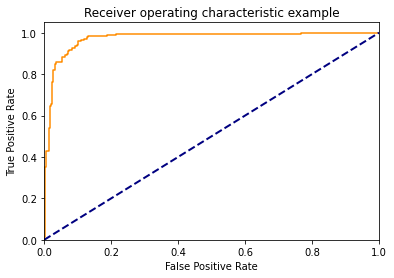


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00888889 0.01333333 0.01333333 0.01555556 0.01555556
 0.01777778 0.01777778 0.02       0.02       0.02222222 0.02222222
 0.02666667 0.02666667 0.03111111 0.03111111 0.03333333 0.03333333
 0.03555556 0.03555556 0.04666667 0.05111111 0.05333333 0.05333333
 0.06222222 0.06222222 0.06888889 0.06888889 0.07111111 0.07111111
 0.07555556 0.07555556 0.08222222 0.08222222 0.08444444 0.08444444
 0.09111111 0.09111111 0.09333333 0.09333333 0.09777778 0.09777778
 0.1        0.1        0.10888889 0.10888889 0.12       0.12
 0.12666667 0.12666667 0.12888889 0.12888889 0.13111111 0.13111111
 0.18888889 0.18888889 0.21555556 0.21555556 0.25333333 0.25777778
 0.30444444 0.30888889 0.36222222 0.36666667 0.46       0.46888889
 0.60888889 0.61333333 0.63111111 0.64       0.64666667 0.65111111
 0.76666667 0.76666667 0.87333333 0.87777778 0.89333333 0.89777778
 0.91777778 0.92222222 1.        ]

tpr :,[0.         0.01058

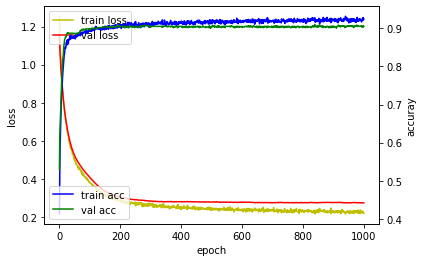

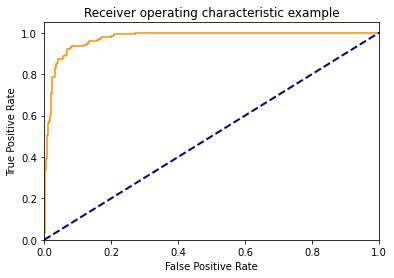


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.00888889 0.00888889 0.01111111
 0.01111111 0.01333333 0.01333333 0.01777778 0.01777778 0.02
 0.02       0.02222222 0.02222222 0.02444444 0.02444444 0.03111111
 0.03111111 0.03555556 0.03555556 0.03777778 0.03777778 0.04
 0.04       0.05555556 0.05555556 0.06222222 0.06222222 0.06666667
 0.06666667 0.06888889 0.06888889 0.07777778 0.07777778 0.08
 0.08       0.08444444 0.08444444 0.11333333 0.11777778 0.12
 0.12       0.12666667 0.12666667 0.13333333 0.13333333 0.15777778
 0.15777778 0.16444444 0.16444444 0.16888889 0.16888889 0.2
 0.2        0.20888889 0.20888889 0.24222222 0.24666667 0.27111111
 0.27111111 0.30888889 0.31333333 0.33777778 0.34222222 0.39555556
 0.4        0.55333333 0.55777778 0.65555556 0.66       0.73777778
 0.74222222 0.76666667 0.77111111 0.77555556 0.78       0.87333333
 0.87777778 1.        ]

tpr :,[0.         0.00529101 0.03174603 0.03174603 0.33862434

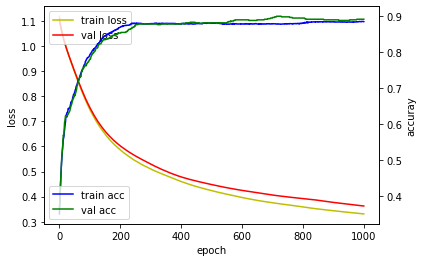

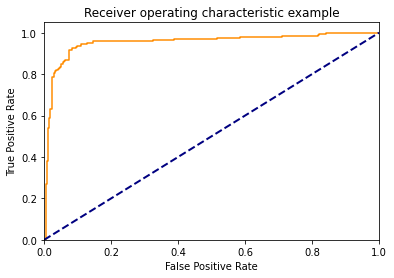


fpr :,[0.         0.00222222 0.00444444 0.00444444 0.00888889 0.00888889
 0.01111111 0.01111111 0.01333333 0.01333333 0.01555556 0.01555556
 0.01777778 0.01777778 0.02222222 0.02222222 0.02444444 0.02444444
 0.02888889 0.02888889 0.03333333 0.03333333 0.03555556 0.03555556
 0.04       0.04       0.04444444 0.04444444 0.04666667 0.04666667
 0.04888889 0.04888889 0.05555556 0.05555556 0.05777778 0.05777778
 0.06222222 0.06222222 0.07333333 0.07333333 0.07555556 0.07555556
 0.08222222 0.08222222 0.08444444 0.08444444 0.09555556 0.09555556
 0.09777778 0.09777778 0.10888889 0.10888889 0.11111111 0.11111111
 0.12666667 0.12666667 0.14666667 0.14666667 0.15333333 0.15777778
 0.18       0.18444444 0.26444444 0.26888889 0.32444444 0.32444444
 0.38888889 0.38888889 0.51555556 0.51555556 0.55333333 0.55777778
 0.58444444 0.58444444 0.66666667 0.67111111 0.69555556 0.7
 0.71111111 0.71111111 0.71333333 0.71777778 0.74444444 0.74888889
 0.77777778 0.78222222 0.78666667 0.79111111 0.81777778 0.8177

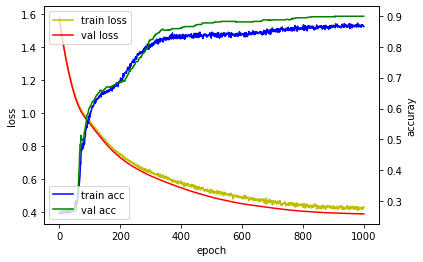

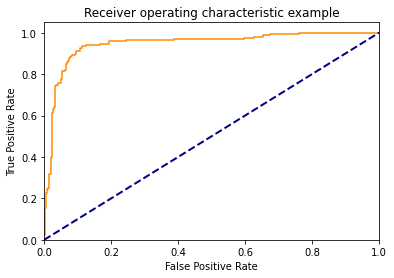


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.00888889 0.00888889 0.01111111
 0.01111111 0.01333333 0.01333333 0.01555556 0.01555556 0.02
 0.02       0.02222222 0.02222222 0.02444444 0.02444444 0.02666667
 0.02666667 0.02888889 0.02888889 0.03333333 0.03333333 0.03555556
 0.03555556 0.04222222 0.04222222 0.04888889 0.04888889 0.05111111
 0.05111111 0.05333333 0.05333333 0.06222222 0.06222222 0.06444444
 0.06444444 0.06666667 0.06666667 0.07111111 0.07111111 0.07333333
 0.07333333 0.07777778 0.07777778 0.08       0.08       0.08222222
 0.08222222 0.09111111 0.09111111 0.09555556 0.09555556 0.10666667
 0.10666667 0.11333333 0.11333333 0.12444444 0.12444444 0.16666667
 0.16666667 0.19333333 0.19333333 0.24444444 0.24444444 0.29333333
 0.29777778 0.37777778 0.38222222 0.38666667 0.38666667 0.44222222
 0.44666667 0.54       0.54444444 0.59555556 0.59555556 0.61333333
 0.61777778 0.62666667 0.62666667 0.64888889 0.65333333 0.653

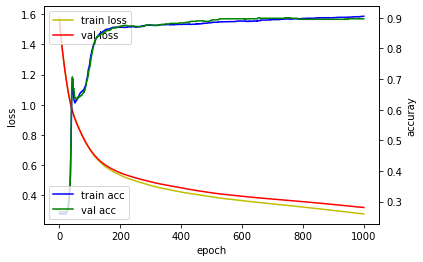

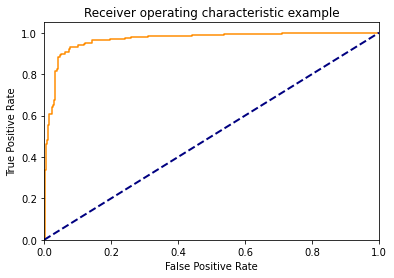


fpr :,[0.         0.         0.00222222 0.00222222 0.00444444 0.00444444
 0.00666667 0.00666667 0.00888889 0.00888889 0.01111111 0.01111111
 0.01333333 0.01333333 0.01555556 0.01555556 0.02       0.02222222
 0.02222222 0.02666667 0.02666667 0.02888889 0.02888889 0.03111111
 0.03111111 0.03333333 0.03333333 0.03777778 0.03777778 0.04
 0.04       0.04222222 0.04222222 0.04666667 0.04666667 0.04888889
 0.04888889 0.06222222 0.06222222 0.07555556 0.07555556 0.07777778
 0.07777778 0.1        0.1        0.11777778 0.11777778 0.12222222
 0.12222222 0.14222222 0.14222222 0.19555556 0.19555556 0.24
 0.24       0.25333333 0.25777778 0.26       0.26       0.26444444
 0.28666667 0.29111111 0.31111111 0.31111111 0.44222222 0.44222222
 0.44666667 0.53555556 0.53555556 0.54       0.59333333 0.59777778
 0.60444444 0.60888889 0.68222222 0.68666667 0.70888889 0.70888889
 0.73777778 0.74222222 0.82666667 0.83111111 0.85333333 0.85777778
 1.        ]

tpr :,[0.         0.00529101 0.00529101 0.33862434 0.

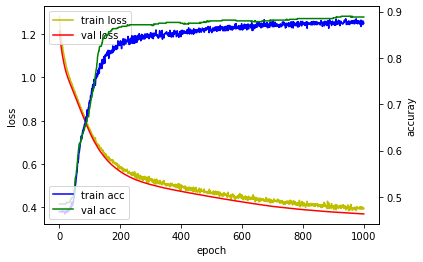

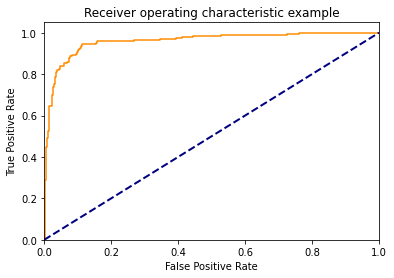


fpr :,[0.         0.         0.00222222 0.00222222 0.00444444 0.00444444
 0.00666667 0.00666667 0.00888889 0.00888889 0.01111111 0.01111111
 0.01333333 0.01333333 0.01555556 0.01555556 0.01777778 0.02222222
 0.02222222 0.02444444 0.02444444 0.02666667 0.02666667 0.02888889
 0.02888889 0.03333333 0.03333333 0.03555556 0.03555556 0.03777778
 0.03777778 0.04444444 0.04444444 0.04666667 0.04666667 0.06
 0.06       0.06666667 0.06666667 0.07333333 0.07333333 0.07555556
 0.07555556 0.07777778 0.07777778 0.08444444 0.08444444 0.09555556
 0.09555556 0.09777778 0.09777778 0.1        0.1        0.10444444
 0.10444444 0.10666667 0.10666667 0.10888889 0.10888889 0.11333333
 0.11333333 0.15555556 0.15555556 0.15777778 0.15777778 0.20888889
 0.21333333 0.26888889 0.26888889 0.34666667 0.34666667 0.37777778
 0.38222222 0.39333333 0.39333333 0.40444444 0.40888889 0.41111111
 0.41111111 0.43111111 0.43555556 0.44       0.44444444 0.44444444
 0.52666667 0.52666667 0.56       0.56444444 0.59555556 0.6
 

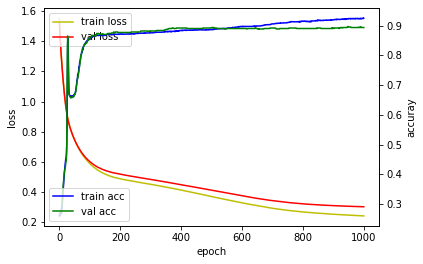

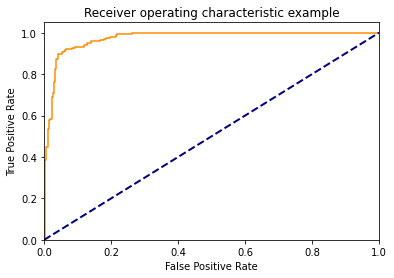


fpr :,[0.         0.00222222 0.00222222 0.00666667 0.00666667 0.01111111
 0.01111111 0.01333333 0.01333333 0.01555556 0.01555556 0.01777778
 0.01777778 0.02222222 0.02222222 0.02444444 0.02444444 0.02666667
 0.02666667 0.02888889 0.02888889 0.03111111 0.03111111 0.03333333
 0.03333333 0.03555556 0.03555556 0.04       0.04       0.04222222
 0.04222222 0.05333333 0.05333333 0.05777778 0.05777778 0.06222222
 0.06222222 0.06444444 0.06444444 0.08444444 0.08444444 0.09333333
 0.09333333 0.12       0.12       0.12666667 0.12666667 0.12888889
 0.12888889 0.14       0.14       0.16666667 0.16666667 0.17555556
 0.18       0.18       0.18444444 0.18444444 0.19777778 0.19777778
 0.21555556 0.21555556 0.21777778 0.21777778 0.26222222 0.26222222
 0.30444444 0.31333333 0.38444444 0.38888889 0.58444444 0.58888889
 0.61555556 0.62       0.63333333 0.63777778 0.70444444 0.70888889
 0.81333333 0.81777778 0.87333333 0.87777778 0.88666667 0.89111111
 1.        ]

tpr :,[0.         0.         0.38624339 0

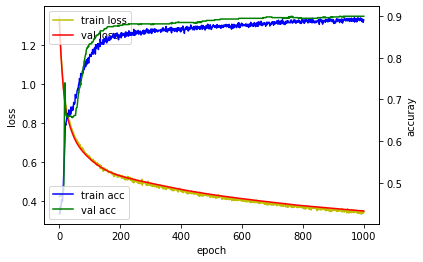

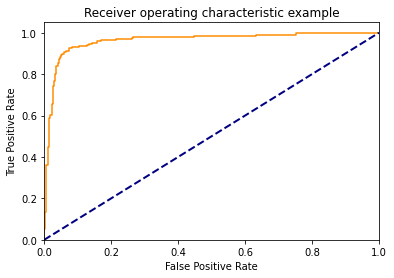


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00666667 0.00666667 0.01111111 0.01111111 0.01333333
 0.01333333 0.01555556 0.01555556 0.01777778 0.01777778 0.02222222
 0.02222222 0.02666667 0.02666667 0.02888889 0.02888889 0.03111111
 0.03111111 0.03333333 0.03333333 0.03555556 0.03555556 0.04
 0.04       0.04444444 0.04444444 0.04666667 0.04666667 0.04888889
 0.04888889 0.05333333 0.05333333 0.05777778 0.05777778 0.06444444
 0.06444444 0.07333333 0.07333333 0.07555556 0.07555556 0.08444444
 0.08444444 0.10444444 0.10444444 0.12888889 0.12888889 0.13333333
 0.13333333 0.14222222 0.14222222 0.15777778 0.15777778 0.16888889
 0.16888889 0.21555556 0.21555556 0.24222222 0.24666667 0.24888889
 0.25333333 0.26222222 0.26222222 0.26666667 0.26666667 0.42666667
 0.43111111 0.44666667 0.44666667 0.49777778 0.50222222 0.56666667
 0.57111111 0.63333333 0.63333333 0.66       0.66444444 0.67111111
 0.67555556 0.72       0.72888889 0.73555556 0.74       0.753

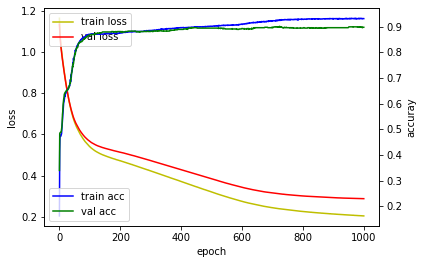

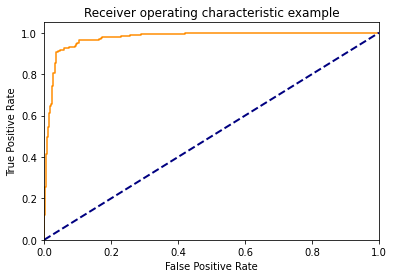


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00666667
 0.00666667 0.00888889 0.00888889 0.01111111 0.01111111 0.01333333
 0.01333333 0.01555556 0.01555556 0.01777778 0.01777778 0.02
 0.02       0.02222222 0.02222222 0.02444444 0.02444444 0.02666667
 0.02666667 0.03111111 0.03111111 0.03333333 0.03333333 0.03555556
 0.03555556 0.04222222 0.04222222 0.04666667 0.04666667 0.05777778
 0.05777778 0.07333333 0.07333333 0.09111111 0.09111111 0.09555556
 0.09555556 0.09777778 0.09777778 0.10444444 0.10444444 0.16444444
 0.16444444 0.16888889 0.16888889 0.17333333 0.17333333 0.17777778
 0.18222222 0.22888889 0.22888889 0.25555556 0.25555556 0.26666667
 0.27111111 0.28888889 0.28888889 0.29777778 0.30666667 0.42
 0.42       0.49111111 0.49555556 0.62       0.62444444 0.7
 0.70444444 0.72       0.72444444 0.80444444 0.80888889 0.84444444
 0.84888889 0.9        0.90444444 1.        ]

tpr :,[0.         0.00529101 0.12169312 0.12169312 0.25396825 0.25396825
 0.41269841 0.4126984

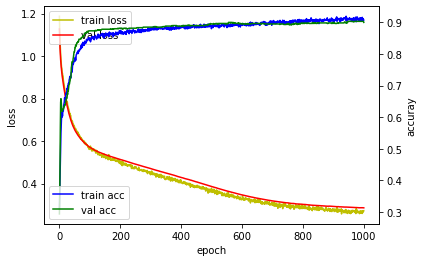

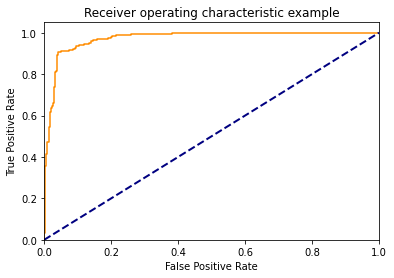


fpr :,[0.         0.         0.         0.00222222 0.00222222 0.00444444
 0.00444444 0.00888889 0.00888889 0.01333333 0.01333333 0.01555556
 0.01555556 0.01777778 0.01777778 0.02       0.02       0.02222222
 0.02222222 0.02444444 0.02444444 0.02666667 0.02666667 0.02888889
 0.02888889 0.03111111 0.03111111 0.03333333 0.03333333 0.03555556
 0.03555556 0.03777778 0.03777778 0.04       0.04       0.05111111
 0.05111111 0.07555556 0.07555556 0.08666667 0.08666667 0.09111111
 0.09111111 0.09555556 0.09555556 0.10444444 0.10444444 0.12
 0.12       0.13333333 0.13333333 0.14       0.14       0.14444444
 0.14444444 0.15777778 0.15777778 0.16666667 0.17111111 0.19111111
 0.19111111 0.2        0.2        0.20222222 0.20222222 0.21333333
 0.21333333 0.23333333 0.23777778 0.26       0.26       0.29555556
 0.3        0.34666667 0.35111111 0.38222222 0.38222222 0.50222222
 0.50666667 0.58222222 0.58666667 0.62444444 0.62888889 0.67555556
 0.68       0.72444444 0.72888889 0.77333333 0.77777778 0.906

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid']
lossFunc = ['categorical_crossentropy']
hidden = [1]
node = [
    [4], [8], [16], [32]
]
batchSize = [512]
dropout = [0, 0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',]  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr, sep=',')
                        print()
                        print('tpr :', tpr, sep=',')
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()